https://pubchemdocs.ncbi.nlm.nih.gov/pug-rest-tutorial


1. Basics, Database managment, 5 points

There is a file with the name 'chem_id_pubmed.txt' in the folder with PubChem CIDs. Please, find a way to automatically download SMILES, Fingerprint2D, and MolecularFormula for these molecules. It must be a py-script written according to PEP-8 with comments. So, it takes as an input argument file-name and returns CSV-file with columns CID, SMILES, Fingerprint2D, and MolecularFormula.
2. Basics, format convertation, 2 points

Make SDF-file from the output file from the previous assignment.
3. Basics, familiarize with RDKit library, 10

The following assignments must be done in a jupyter notebook

    Depict your molecules
    Calculate similarity of molecules using MACCS Keys, Morgan Fingerprints, and RDKit fingerprint. Plot distribution of similarity values.

4. Advanced, code Morgan alghorithm, 20

    It must be py-script written according to PEP-8 with comments. So, it takes as an input argument a file name and returns a CSV file with a table that contains atomic labels and their numbers. Moreover, it should contain module that visualize a molecule with numbering.



<h2>TASK 1</h2>

> 1. Basics, Database managment, 5 points
>
>There is a file with the name 'chem_id_pubmed.txt' in the folder with PubChem CIDs. Please, find a way to automatically download SMILES, Fingerprint2D, and MolecularFormula for these molecules. It must be a py-script written according to PEP-8 with comments. So, it takes as an input argument file-name and returns CSV-file with columns CID, SMILES, Fingerprint2D, and MolecularFormula.

In [ ]:
"""
#Full py script:
import pubchempy as pcp
import pandas as pd

compaund = []  #Создаю листы в которые будет записана информация
smiles = []    
fingers = []   
mol_form = []  

#Чтение файла и создание списка id2 содержашего CID
with open(r"/home/aster/Cheminformatics_MIPT/Cheminformatics_MIPT/Practice/A[0]/chem_id_pubmed.txt"
          , "r") as table: 
    id2 = [line.strip() for line in table]

#Скачивание компаундов для каждого CID с PubChem черзе их пакет
for i in id2:
    compaund.append(pcp.Compound.from_cid(i))
    
#Для каждого комаудна скачивается SMILES
for i in compaund:
    smiles.append(i.canonical_smiles)

#Для каждого комаудна скачивается fingerprints    
for i in compaund:
    fingers.append(i.fingerprint)
    
#Для каждого комаудна скачивается молекулярная формула
for i in compaund:
    mol_form.append(i.molecular_formula)
    
#Перевод всех листо в серии из пандаса    
se_id2 = pd.Series(id2)
se_smiles = pd.Series(smiles)
se_fingers = pd.Series(fingers)
se_mol = pd.Series(mol_form)

#Формирование серий в один дата фрейм
frame = pd.DataFrame({"cid": se_id2,
                      "SMILES": se_smiles,
                      "Fingerprints2D": se_fingers,
                      "MolecularFormula": se_mol  
                    })

frame.to_csv("chemo_tab")
"""

In [179]:
import requests
import pandas as pd
from rdkit import Chem

In [73]:
#pug_urlexample = "https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/vioxx/property/InChI/TXT"
#https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/""/property/CanonicalSMILES/CSV""


In [233]:

with open(r"/home/aster/Cheminformatics_MIPT/chem_id_pubmed.txt") as file:
    n = file.read().replace("\n", ",") #Чтение файла полностью и замена знака конца строки на ,

In [234]:
print(n)

459803,91899426,286003,47289,451668,16218924,60961,2051,2126,9810212,135400486,25099184,2303,82146,448949,25150857,53789347,1080352,23891512,9687,264,512282,5943,11345983,2662,


In [235]:
#Создание url для PUG REST
url_for_CID_CSV = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/' + n + '/property/CanonicalSMILES,MolecularFormula,Fingerprint2D/CSV'

In [236]:
print(url_for_CID_CSV)

https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/459803,91899426,286003,47289,451668,16218924,60961,2051,2126,9810212,135400486,25099184,2303,82146,448949,25150857,53789347,1080352,23891512,9687,264,512282,5943,11345983,2662,/property/CanonicalSMILES,MolecularFormula,Fingerprint2D/CSV


In [240]:
get_info_CSV = requests.get(url_for_CID_CSV)  
#Обращение к url через пакет requests

In [243]:
# Создание файла таблицы.
with open("Chem_tab.csv", "wb") as res:
    a = res.write(get_info_CSV.content)

In [244]:
chem_tab = pd.read_csv("Chem_tab.csv")

In [245]:
chem_tab

,CID,CanonicalSMILES,MolecularFormula,Fingerprint2D
0,459803,C1=CC2=C(C3=C(C=C2)C(=O)C(=CN3)C(=O)O)N=C1,C13H8N2O3,AAADccBzMAAAAAAAAAAAAAAAAAAAAAAAAAA8QIAAAAAAAA...
1,91899426,C(C(C1=C(C(=C(O1)O)OP(=O)([O-])[O-])[O-])O)O,C6H6O9P-3,AAADcYBgPAIAAAAAAAAAAAAAAAAAASAAAAAAAAAAAAAAAA...
2,286003,CC1(OC2C(O1)C(OC2C(=O)O)N3C=NC4=C(N=CN=C43)N)C,C13H15N5O5,AAADccBzuAAAAAAAAAAAAAAAAAAAAWJEgAAsAAAAAAASAF...
3,47289,CN(CCCC(=O)C1=CN=CC=C1)N=O,C10H13N3O2,AAADccBzMAAAAAAAAAAAAAAAAAAAAAAAAAAsAAAAAAAAAA...
4,451668,C1C(C(OC1N2C=NC(=NC2=O)N)CO)O,C8H12N4O4,AAADccBzuAAAAAAAAAAAAAAAAAAAASAAAAAgAAAAAAAAAA...
5,16218924,CC1=NC(=CC=C1)C2=NN(C=C2C3=CC=NC4=CC=CC=C34)C(...,C25H19N5S,AAADceB7gABAAAAAAAAAAAAAAAAAAWAAAAA8eIEAAAAAAA...
6,60961,C1=NC(=C2C(=N1)N(C=N2)C3C(C(C(O3)CO)O)O)N,C10H13N5O4,AAADccBzuAAAAAAAAAAAAAAAAAAAAWJAAAAsAAAAAAAAAF...
7,2051,COC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC(=CC=C3)Cl)OC,C16H14ClN3O2,AAADccB7MAAEAAAAAAAAAAAAAAAAAAAAAAA8YIAAAAAAAA...
8,2126,CC1(CCC(C2=C1C=CC(=C2)C(=O)NC3=CC=C(C=C3)C(=O)...,C22H25NO3,AAADceB6MAAAAAAAAAAAAAAAAAAAAAAAAAAwYMAAAAAAAA...
9,9810212,C1=CC=C2C(=C1)C(=O)OC23C4=CC(=C(C(=C4OC5=C(C(=...,C20H6Br4Na2O5,AAADcYB4ODAAHAAAAAAAAAAAAAAAASAAAAA0YMEAAAAAAE...


<h2>TASK 2</h2>

>2. Basics, format convertation, 2 points
>
>Make SDF-file from the output file from the previous assignment. 


In [248]:
smile = chem_tab["CanonicalSMILES"].tolist()
# Перевод столбца в форму листа

In [277]:
mols = []
for i in smile:
    mols.append(Chem.MolFromSmiles(i))
#Создание молекулярной формы для каждого значения

In [278]:
blocks =[]
for i in mols:
    blocks.append(Chem.MolToMolBlock(i))


In [283]:
CID2_SDF = pd.Series(chem_tab.CID)
se_mols = pd.Series(mols)
se_blocks = pd.Series(blocks)
nn = pd.DataFrame({"CID": CID2_SDF,
             "mols":se_mols,
             "blocks":se_blocks})
#Создание df из серий пандаса

In [284]:
print(nn)

          CID                                              mols  \
0      459803  <rdkit.Chem.rdchem.Mol object at 0x7ff30b9fd800>   
1    91899426  <rdkit.Chem.rdchem.Mol object at 0x7ff30b9fdb20>   
2      286003  <rdkit.Chem.rdchem.Mol object at 0x7ff30b9fdd50>   
3       47289  <rdkit.Chem.rdchem.Mol object at 0x7ff30b9fdda0>   
4      451668  <rdkit.Chem.rdchem.Mol object at 0x7ff30b9fddf0>   
5    16218924  <rdkit.Chem.rdchem.Mol object at 0x7ff30b9fde40>   
6       60961  <rdkit.Chem.rdchem.Mol object at 0x7ff30b9fde90>   
7        2051  <rdkit.Chem.rdchem.Mol object at 0x7ff30b9fdee0>   
8        2126  <rdkit.Chem.rdchem.Mol object at 0x7ff30b9fdf30>   
9     9810212  <rdkit.Chem.rdchem.Mol object at 0x7ff30b9fdf80>   
10  135400486  <rdkit.Chem.rdchem.Mol object at 0x7ff350533490>   
11   25099184  <rdkit.Chem.rdchem.Mol object at 0x7ff350533ee0>   
12       2303  <rdkit.Chem.rdchem.Mol object at 0x7ff30bbabda0>   
13      82146  <rdkit.Chem.rdchem.Mol object at 0x7ff30bbab3f0

In [285]:
from rdkit.Chem import PandasTools


In [287]:
ss = PandasTools.WriteSDF(nn, "Che.sdf", molColName="mols")

#Создание файла SDF при помощий комады из RDKit

<h2>TASK 3</h2>

>3. Basics, familiarize with RDKit library, 10

>The following assignments must be done in a jupyter notebook
>
>Depict your molecules
Calculate similarity of molecules using MACCS Keys, Morgan Fingerprints, and RDKit fingerprint. Plot distribution of similarity values.

In [250]:
CID = chem_tab["CID"].tolist()

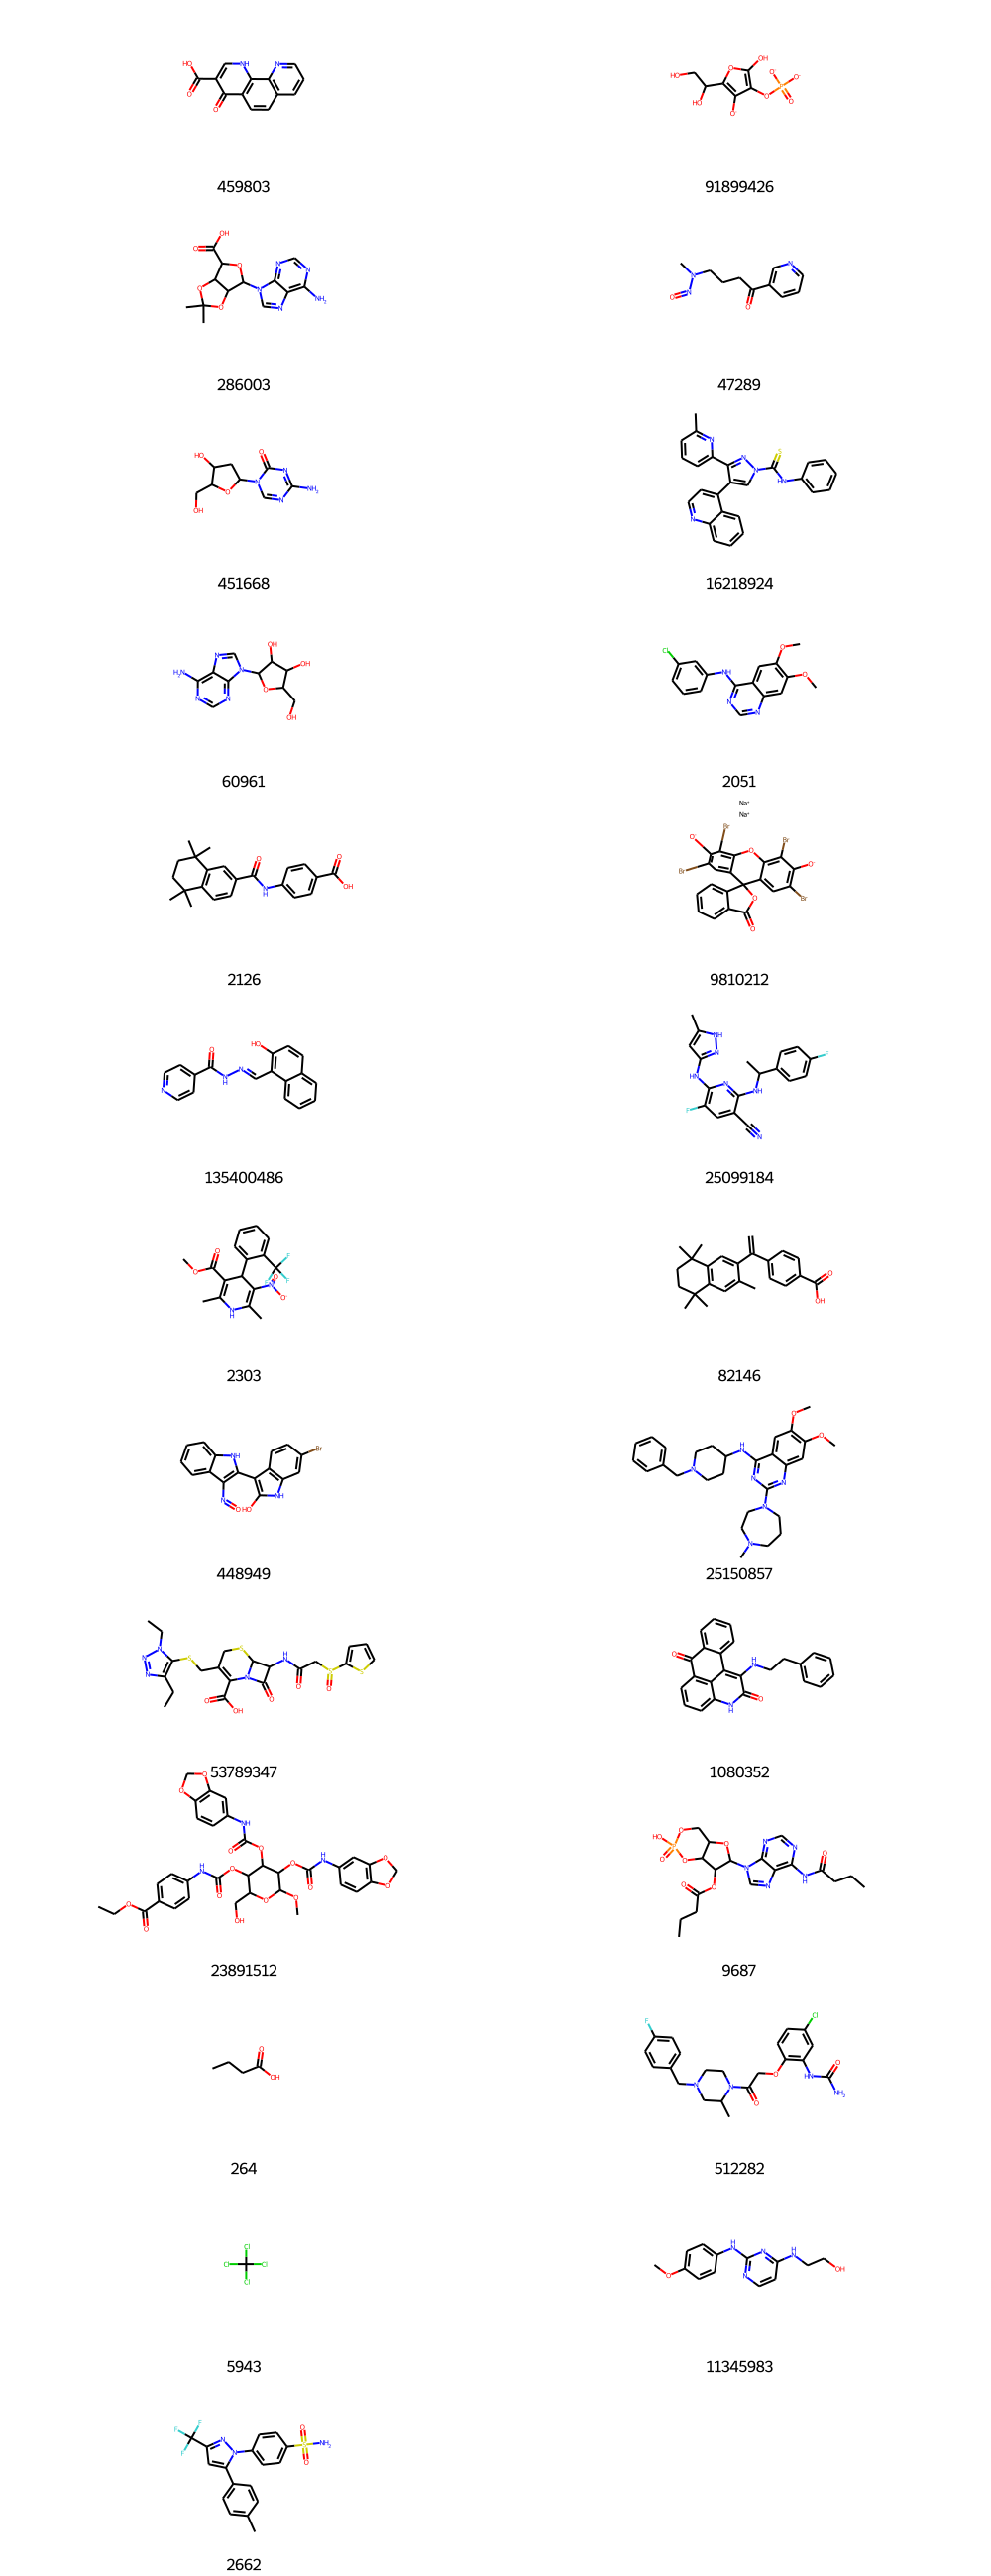

In [324]:
mols = [Chem.MolFromSmiles(i) for i in smile]

Chem.Draw.MolsToGridImage(mols, molsPerRow = 2, subImgSize=(500,200), legends=[str(x) for x in chem_tab.CID])
#Создание рисунка из молекулярных форм 

In [290]:
from rdkit.Chem import MACCSkeys


In [292]:
maccs_keys = [MACCSkeys.GenMACCSKeys(m) for m in mols]
#Создание MACCS fingerprints для всех значений и запись их в лист

In [293]:
print(list(maccs_keys[0]))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [307]:
comp_MACCS=0
comp_list_MACCS = []
for i in range(len(maccs_keys)):
    for j in range(i+1, len(maccs_keys)):
        comp_MACCS = (DataStructs.FingerprintSimilarity(maccs_keys[i], maccs_keys[j]))
        #Сравнение похожести попарно по фингерпринтам
        comp_list_MACCS.append(comp_MACCS)
        print("similarity with MACCS of", 
              chem_tab.CID[i], "and", chem_tab.CID[j],
              "CID = ", round(comp_MACCS,3), end = "") 
        if ( comp_MACCS >= 0.85 ):
            print(" ****")
        elif ( comp_MACCS >= 0.75 ):
            print(" ***")
        elif ( comp_MACCS >= 0.65 ):
            print(" **")
        elif ( comp_MACCS >= 0.55 ):
            print(" *")
        else:
            print(" ")

similarity with MACCS of 459803 and 91899426 CID =  0.298 
similarity with MACCS of 459803 and 286003 CID =  0.45 
similarity with MACCS of 459803 and 47289 CID =  0.262 
similarity with MACCS of 459803 and 451668 CID =  0.412 
similarity with MACCS of 459803 and 16218924 CID =  0.345 
similarity with MACCS of 459803 and 60961 CID =  0.453 
similarity with MACCS of 459803 and 2051 CID =  0.52 
similarity with MACCS of 459803 and 2126 CID =  0.392 
similarity with MACCS of 459803 and 9810212 CID =  0.469 
similarity with MACCS of 459803 and 135400486 CID =  0.609 *
similarity with MACCS of 459803 and 25099184 CID =  0.345 
similarity with MACCS of 459803 and 2303 CID =  0.333 
similarity with MACCS of 459803 and 82146 CID =  0.306 
similarity with MACCS of 459803 and 448949 CID =  0.5 
similarity with MACCS of 459803 and 25150857 CID =  0.386 
similarity with MACCS of 459803 and 53789347 CID =  0.365 
similarity with MACCS of 459803 and 1080352 CID =  0.519 
similarity with MACCS of 459

similarity with MACCS of 2126 and 2662 CID =  0.247 
similarity with MACCS of 9810212 and 135400486 CID =  0.333 
similarity with MACCS of 9810212 and 25099184 CID =  0.246 
similarity with MACCS of 9810212 and 2303 CID =  0.268 
similarity with MACCS of 9810212 and 82146 CID =  0.32 
similarity with MACCS of 9810212 and 448949 CID =  0.365 
similarity with MACCS of 9810212 and 25150857 CID =  0.237 
similarity with MACCS of 9810212 and 53789347 CID =  0.242 
similarity with MACCS of 9810212 and 1080352 CID =  0.286 
similarity with MACCS of 9810212 and 23891512 CID =  0.415 
similarity with MACCS of 9810212 and 9687 CID =  0.306 
similarity with MACCS of 9810212 and 264 CID =  0.106 
similarity with MACCS of 9810212 and 512282 CID =  0.268 
similarity with MACCS of 9810212 and 5943 CID =  0.077 
similarity with MACCS of 9810212 and 11345983 CID =  0.214 
similarity with MACCS of 9810212 and 2662 CID =  0.211 
similarity with MACCS of 135400486 and 25099184 CID =  0.368 
similarity wit

In [255]:
from rdkit.Chem import AllChem


In [257]:
from rdkit import DataStructs

In [294]:

fpsMorgan = [AllChem.GetMorganFingerprintAsBitVect(m, 2) for m in mols]

In [309]:
comp=0
comp_list = []
count = 0
for i in range(len(fpsMorgan)):
    for j in range(i+1, len(fpsMorgan)):
        comp = (DataStructs.FingerprintSimilarity(fpsMorgan[i], fpsMorgan[j]))
        #Сравнение похожести попарно по фингерпринтам
        comp_list.append(comp)
        count += 1
        print("similarity with Morgan of", 
              chem_tab.CID[i], "and", chem_tab.CID[j],
              "CID = ", round(comp,3), end = "" )
        if ( comp >= 0.85 ):
            print(" ****")
        elif ( comp >= 0.75 ):
            print(" ***")
        elif ( comp >= 0.65 ):
            print(" **")
        elif ( comp >= 0.55 ):
            print(" *")
        else:
            print(" ")

similarity with Morgan of 459803 and 91899426 CID =  0.045 
similarity with Morgan of 459803 and 286003 CID =  0.122 
similarity with Morgan of 459803 and 47289 CID =  0.177 
similarity with Morgan of 459803 and 451668 CID =  0.118 
similarity with Morgan of 459803 and 16218924 CID =  0.156 
similarity with Morgan of 459803 and 60961 CID =  0.086 
similarity with Morgan of 459803 and 2051 CID =  0.101 
similarity with Morgan of 459803 and 2126 CID =  0.125 
similarity with Morgan of 459803 and 9810212 CID =  0.087 
similarity with Morgan of 459803 and 135400486 CID =  0.203 
similarity with Morgan of 459803 and 25099184 CID =  0.076 
similarity with Morgan of 459803 and 2303 CID =  0.108 
similarity with Morgan of 459803 and 82146 CID =  0.145 
similarity with Morgan of 459803 and 448949 CID =  0.134 
similarity with Morgan of 459803 and 25150857 CID =  0.091 
similarity with Morgan of 459803 and 53789347 CID =  0.111 
similarity with Morgan of 459803 and 1080352 CID =  0.114 
similari

similarity with Morgan of 2126 and 5943 CID =  0.0 
similarity with Morgan of 2126 and 11345983 CID =  0.141 
similarity with Morgan of 2126 and 2662 CID =  0.087 
similarity with Morgan of 9810212 and 135400486 CID =  0.083 
similarity with Morgan of 9810212 and 25099184 CID =  0.049 
similarity with Morgan of 9810212 and 2303 CID =  0.122 
similarity with Morgan of 9810212 and 82146 CID =  0.108 
similarity with Morgan of 9810212 and 448949 CID =  0.132 
similarity with Morgan of 9810212 and 25150857 CID =  0.066 
similarity with Morgan of 9810212 and 53789347 CID =  0.067 
similarity with Morgan of 9810212 and 1080352 CID =  0.129 
similarity with Morgan of 9810212 and 23891512 CID =  0.066 
similarity with Morgan of 9810212 and 9687 CID =  0.052 
similarity with Morgan of 9810212 and 264 CID =  0.02 
similarity with Morgan of 9810212 and 512282 CID =  0.079 
similarity with Morgan of 9810212 and 5943 CID =  0.0 
similarity with Morgan of 9810212 and 11345983 CID =  0.041 
similarit

In [316]:
from matplotlib import pyplot as plt

Matplotlib is building the font cache; this may take a moment.


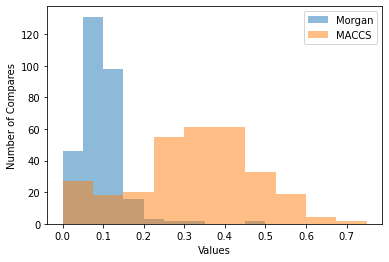

In [323]:
plt.hist(comp_list, alpha = 0.5, label="Morgan")
plt.hist(comp_list_MACCS, alpha = 0.5, label="MACCS")
plt.ylabel("Number of Compares")
plt.xlabel("Values")
plt.legend(loc='upper right')

<h2>TASK 4</h2>

>Advanced, code Morgan alghorithm, 20
>
>It must be py-script written according to PEP-8 with comments. So, it takes as an input argument a file name and returns a CSV file with a table that contains atomic labels and their numbers. Moreover, it should contain module that visualize a molecule with numbering.


In [98]:
#for i in mol:
  #  print(Chem.MolToMolBlock(i))